In [1]:
# Nutné importy ze standardní knihovny
import os
from urllib.request import urlretrieve

# Seznam souborů (viz níže)
zdroje = [
    # Země
    "https://raw.githubusercontent.com/janpipek/data-pro-pyladies/master/data/countries.csv",

    # Česká data
    "https://raw.githubusercontent.com/janpipek/data-pro-pyladies/master/data/cze.csv"
]

for zdroj in zdroje:
    # Pouze poslední část cesty adresy datového zdroje je jeho jméno
    jmeno = zdroj.rsplit("/")[-1]
    
    if not os.path.exists(jmeno):        
        print(f"Soubor {jmeno} ještě není stažen, jdeme na to...")
        urlretrieve(url=zdroj, filename=jmeno)
        print(f"Soubor {jmeno} úspěšně stažen.")
    else:
        print(f"Soubor {jmeno} už byl stažen, použijeme místní kopii.")
print("Všechny soubory jsou staženy.")

Soubor countries.csv už byl stažen, použijeme místní kopii.
Soubor cze.csv ještě není stažen, jdeme na to...
Soubor cze.csv úspěšně stažen.
Všechny soubory jsou staženy.


In [2]:
import pandas as pd

countries = pd.read_csv("countries.csv").set_index("name")
czech = pd.read_csv("cze.csv")
czech.tail()

year  population  alcohol_adults  bmi_men  bmi_women  \
29  2009  10440000.0             NaN      NaN        NaN   
30  2010  10490000.0             NaN      NaN        NaN   
31  2011  10530000.0             NaN      NaN        NaN   
32  2012  10570000.0             NaN      NaN        NaN   
33  2013  10590000.0             NaN      NaN        NaN   

    car_deaths_per_100000_people  calories_per_day  infant_mortality  \
29                           NaN            3276.0               3.6   
30                           NaN            3276.0               3.4   
31                           NaN            3251.0               3.2   
32                           NaN            3243.0               3.2   
33                           NaN            3256.0               3.0   

    life_expectancy  life_expectancy_female  life_expectancy_male  
29            77.24                  80.450                74.234  
30            77.47                  80.672                74.511  
31            77.75                  80.873                74.768  
32            78.00                  81.055                75.006  
33            78.27                  81.219                75.225

In [3]:
countries

iso             world_6region world_4region        income_groups  \
name                                                                            
Afghanistan  AFG                south_asia          asia           low_income   
Albania      ALB       europe_central_asia        europe  upper_middle_income   
Algeria      DZA  middle_east_north_africa        africa  upper_middle_income   
Andorra      AND       europe_central_asia        europe          high_income   
Angola       AGO        sub_saharan_africa        africa  upper_middle_income   
...          ...                       ...           ...                  ...   
Venezuela    VEN                   america      americas  upper_middle_income   
Vietnam      VNM         east_asia_pacific          asia  lower_middle_income   
Yemen        YEM  middle_east_north_africa          asia  lower_middle_income   
Zambia       ZMB        sub_saharan_africa        africa  lower_middle_income   
Zimbabwe     ZWE        sub_saharan_africa        africa           low_income   

             is_eu  is_oecd eu_accession  year       area  population  \
name                                                                    
Afghanistan  False    False          NaN  2018   652860.0  34500000.0   
Albania      False    False          NaN  2018    28750.0   3238000.0   
Algeria      False    False          NaN  2018  2381740.0  36980000.0   
Andorra      False    False          NaN  2017      470.0     88910.0   
Angola       False    False          NaN  2018  1246700.0  20710000.0   
...            ...      ...          ...   ...        ...         ...   
Venezuela    False    False          NaN  2018   912050.0  30340000.0   
Vietnam      False    False          NaN  2018   330967.0  90660000.0   
Yemen        False    False          NaN  2018   527970.0  26360000.0   
Zambia       False    False          NaN  2018   752610.0  14310000.0   
Zimbabwe     False    False          NaN  2018   390760.0  13330000.0   

             alcohol_adults  bmi_men  bmi_women  car_deaths_per_100000_people  \
name                                                                            
Afghanistan            0.03    20.62      21.07                           NaN   
Albania                7.29    26.45      25.66                         5.978   
Algeria                0.69    24.60      26.37                           NaN   
Andorra               10.17    27.63      26.43                           NaN   
Angola                 5.57    22.25      23.48                           NaN   
...                     ...      ...        ...                           ...   
Venezuela              7.60    27.45      28.13                         7.332   
Vietnam                3.91    20.92      21.07                           NaN   
Yemen                  0.20    24.44      26.11                           NaN   
Zambia                 3.56    20.68      23.05                        11.260   
Zimbabwe               4.96    22.03      24.65                        20.850   

             calories_per_day  infant_mortality  life_expectancy  \
name                                                               
Afghanistan            2090.0              66.3            58.69   
Albania                3193.0              12.5            78.01   
Algeria                3296.0              21.9            77.86   
Andorra                   NaN               2.1            82.55   
Angola                 2473.0              96.0            65.19   
...                       ...               ...              ...   
Venezuela              2631.0              12.9            75.91   
Vietnam                2745.0              17.3            74.88   
Yemen                  2223.0              33.8            67.14   
Zambia                 1930.0              43.3            59.45   
Zimbabwe               2110.0              46.6            60.18   

             life_expectancy_female  life_expectancy_male un_accession

<AxesSubplot: xlabel='name'>

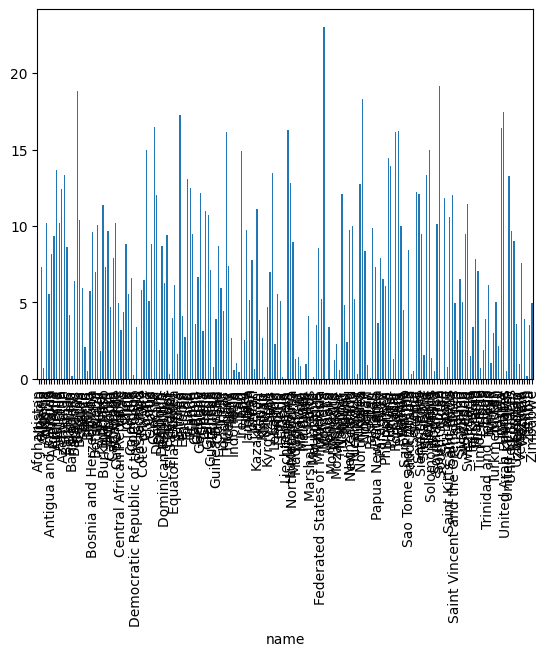

In [7]:
countries["alcohol_adults"].plot.bar()

In [11]:
chlastajici = countries.query("alcohol_adults > 12")

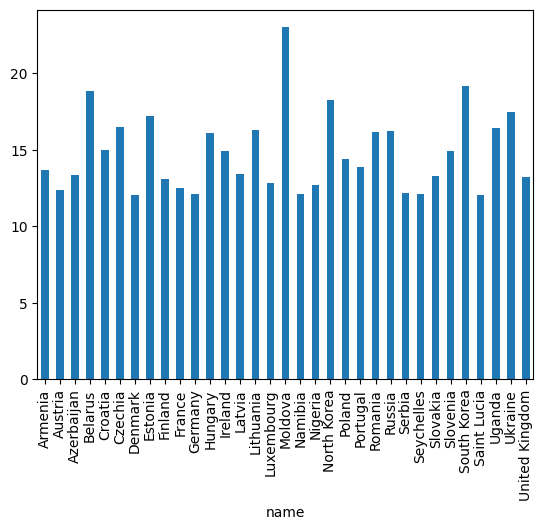

In [12]:
graf_chlast = chlastajici["alcohol_adults"].plot.bar()

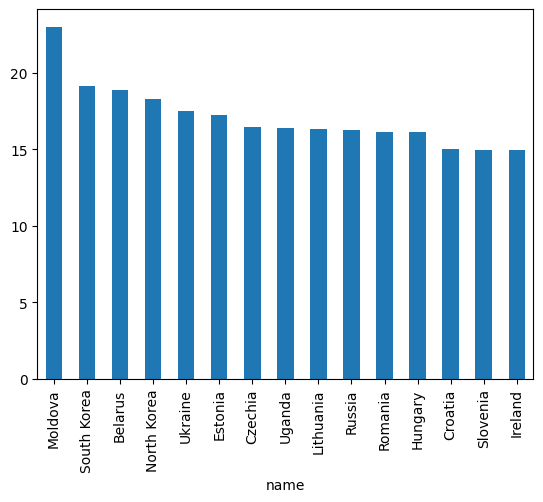

In [15]:
y = countries["alcohol_adults"].sort_values(ascending=False).head(15)
graf_chlast_2 = y.plot.bar()

<AxesSubplot: ylabel='name'>

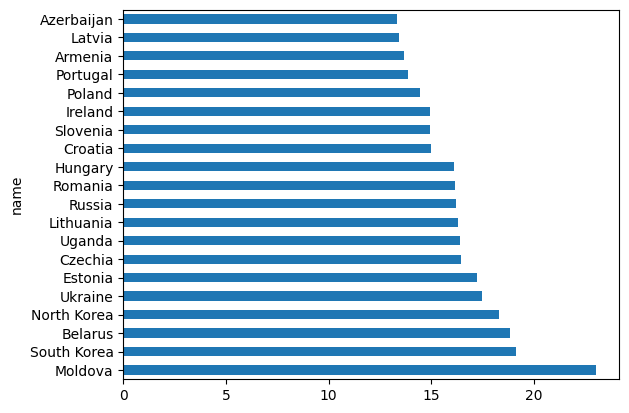

In [18]:
countries["alcohol_adults"].sort_values(ascending=False).head(20).plot.barh()

Funkce pro kreslení grafů nabízejí spoustu parametrů, které nejsou úplně dobře zdokumentované a jsou dost úzce svázány s tím, jak funguje knihovna matplotlib. Budeme si je postupně ukazovat, když nám přijdou vhod. Náš graf by se nám hodilo trošku zvětšit na výšku. Také se hodnoty od sebe příliš neliší a nastavení vlastního rozsahu na ose x by pomohlo rozdíly zvýraznit. Plus si přidáme trošku formátování.

figsize specifikuje velikost grafu jako dvojici (tuple) velikosti v palcích v pořadí (šířka, výška). Pro volbu ideální hodnoty si prostě v notebooku zaexperimentuj.
xlim specifikuje rozsah hodnot na ose x v podobně dvojice (minimum, maximum)
color specifikuje barvu výplně: může jít o název či o hexadecimální RGB zápis
edgecolor říká, jakou barvou mají být sloupce ohraničeny
title nastavuje titulek celého grafu

<AxesSubplot: title={'center': 'Chlast !'}, ylabel='name'>

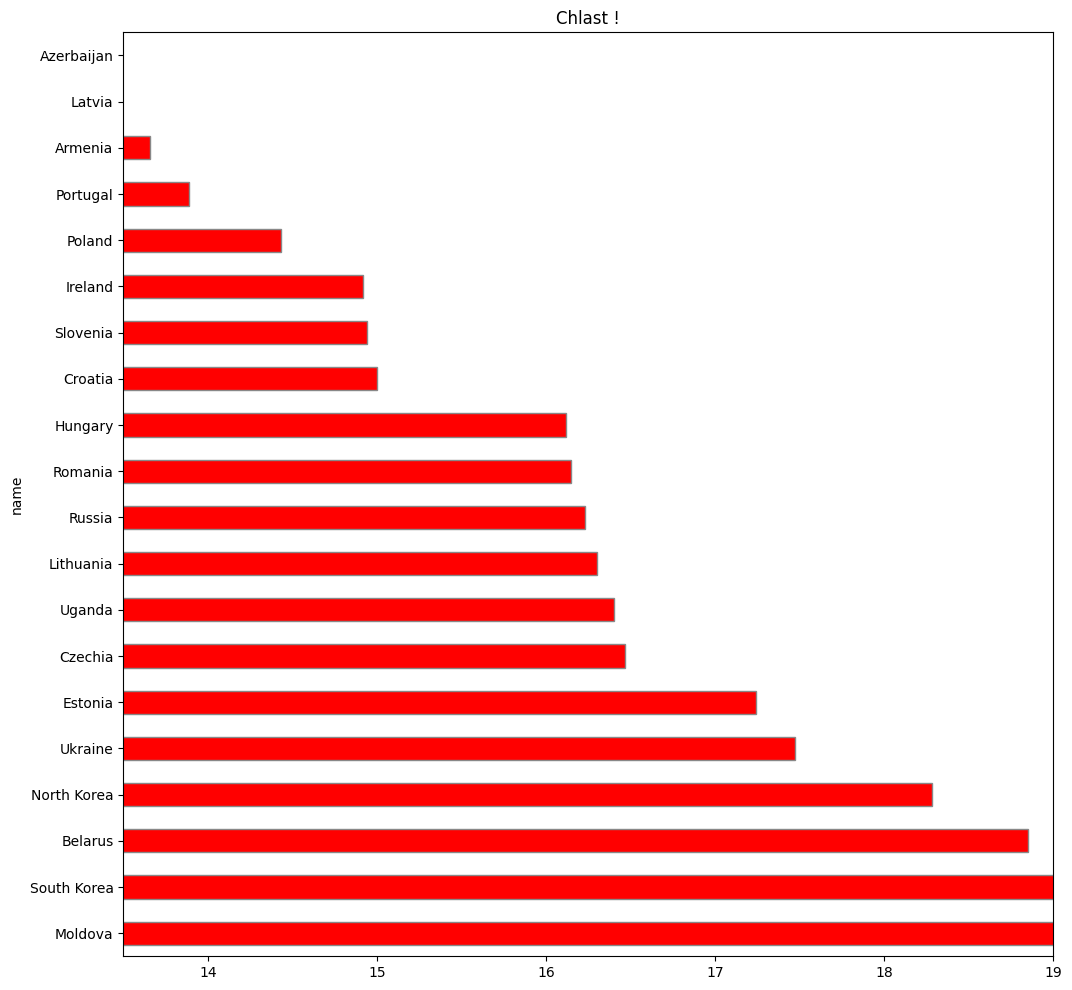

In [23]:
countries["alcohol_adults"].sort_values(ascending=False).head(20).plot.barh(
    figsize=(12, 12),
    xlim=(13.5, 19),
    color="red",
    edgecolor="#888888",   # střední šeď
    title="Chlast !"
)

In [24]:
eu_countries = countries.query("is_eu") 

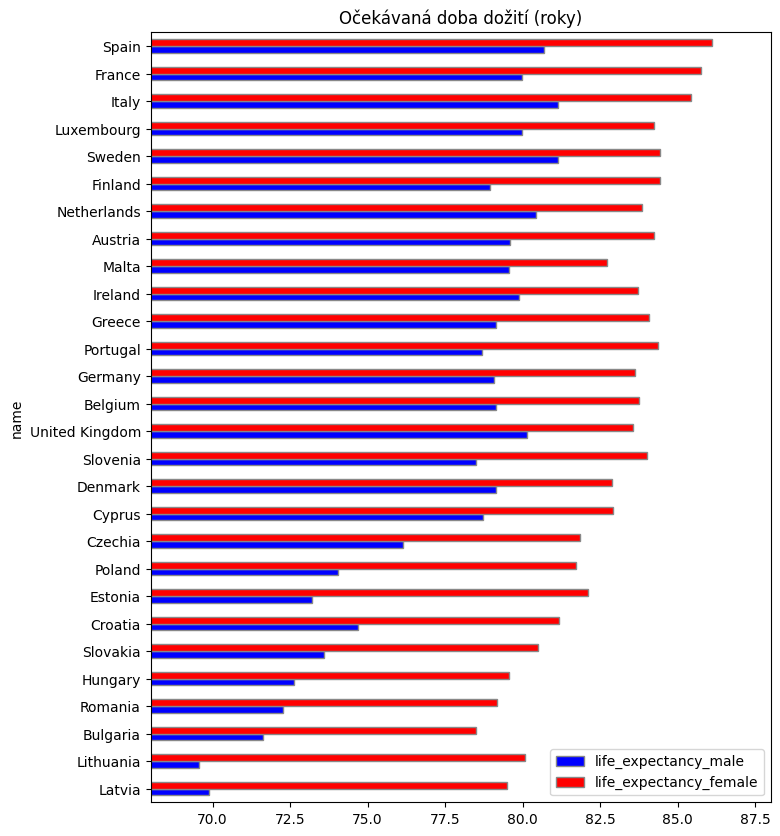

In [25]:

eu_countries.sort_values("life_expectancy")[["life_expectancy_male", "life_expectancy_female"]].plot.barh(
    figsize=(8, 10),
    xlim=(68, 88),               # rozsah osy
    color=["blue", "red"],       # dvě různé barvy pro dva sloupce
    edgecolor="#888888",         # střední šeď
    title="Očekávaná doba dožití (roky)"
);

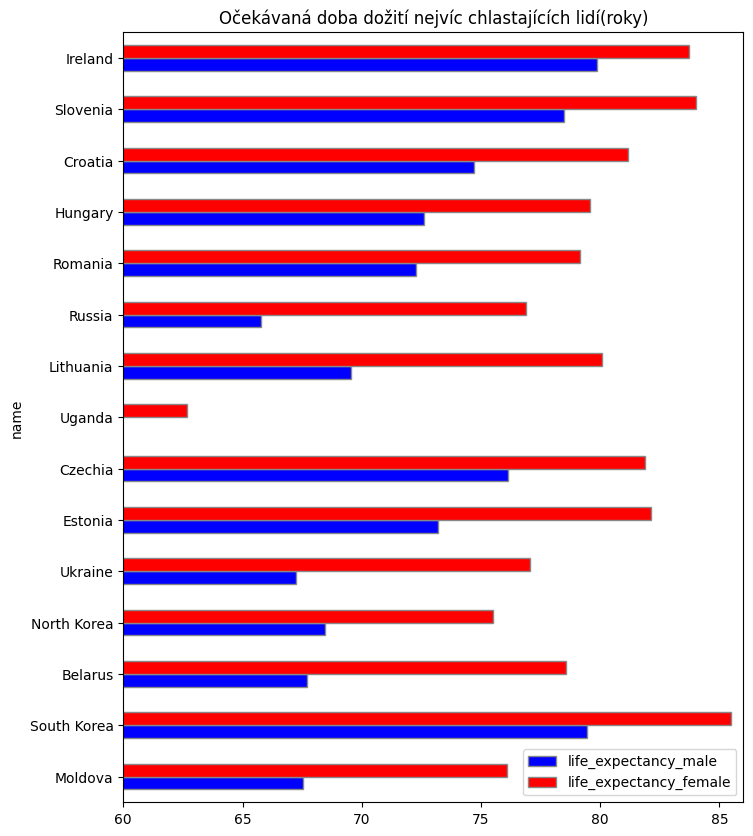

In [30]:
countries.sort_values("alcohol_adults",ascending=False).head(15)[["life_expectancy_male", "life_expectancy_female"]].plot.barh(
    figsize=(8, 10),
    xlim=(60, 86),               # rozsah osy
    color=["blue", "red"],       # dvě různé barvy pro dva sloupce
    edgecolor="#888888",         # střední šeď
    title="Očekávaná doba dožití nejvíc chlastajících lidí(roky)"
);

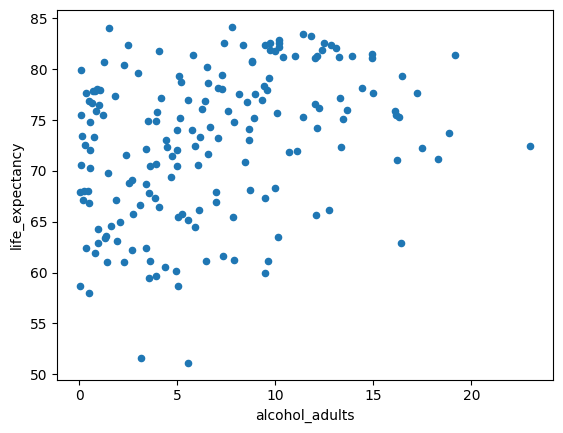

In [31]:
# Souvislost mezi pitím a střední dobou života
countries.plot.scatter(
    x="alcohol_adults",
    y="life_expectancy",
);

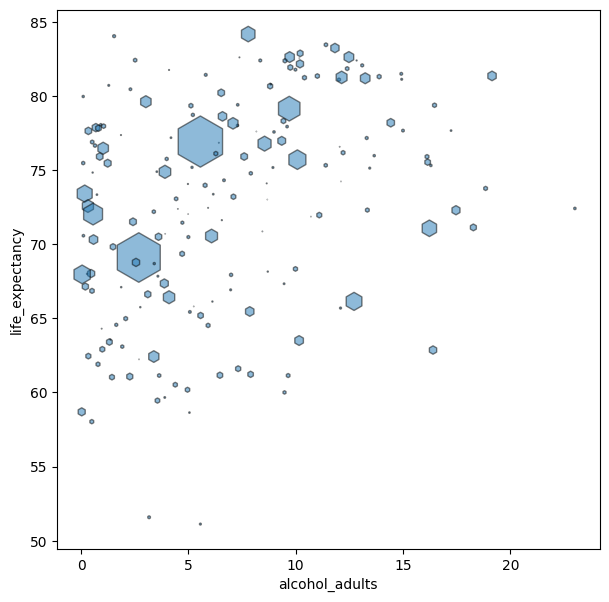

In [32]:
# Souvislost mezi pitím a střední dobou života
countries.plot.scatter(
    figsize=(7, 7),
    x="alcohol_adults",
    y="life_expectancy",
    marker="h",        # Tvar symbolu: šestiúhelník - (h)exagon   
    s=countries["population"] / 1e6,   # Velikost symbolu (na druhou) podle populace
    edgecolor="black", # Barva okraje
    alpha=0.5          # Poloprůhledné symboly
);

In [33]:
barvy_regionu = {
    "europe": "blue",
    "asia": "yellow",
    "africa": "black",
    "americas": "red"
}
barva = countries["world_4region"].map(barvy_regionu)

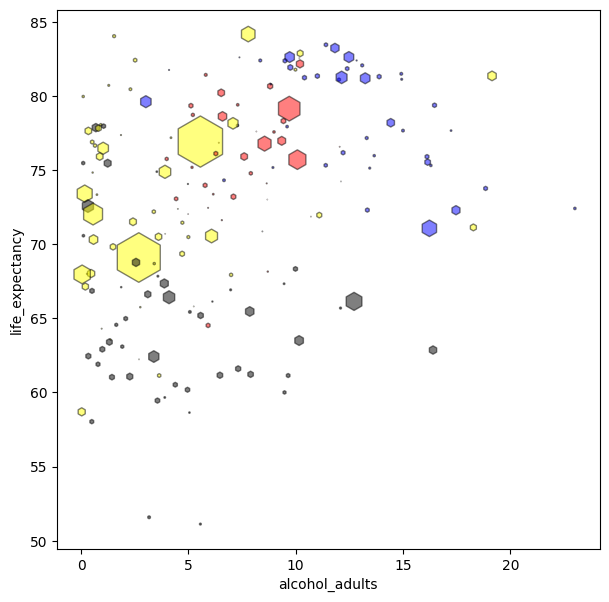

In [34]:
countries.plot.scatter(
    figsize=(7, 7),
    x="alcohol_adults",
    y="life_expectancy",
    marker="h",        # Tvar symbolu: šestiúhelník - (h)exagon
    color=barva,       # Bohužel nejde použít jen jméno sloupce, musíme dát celé "pole" hodnot      
    s=countries["population"] / 1e6,   # Velikost symbolu (na druhou) podle populace
    edgecolor="black", # Barva okraje
    alpha=0.5          # Poloprůhledné symboly
);

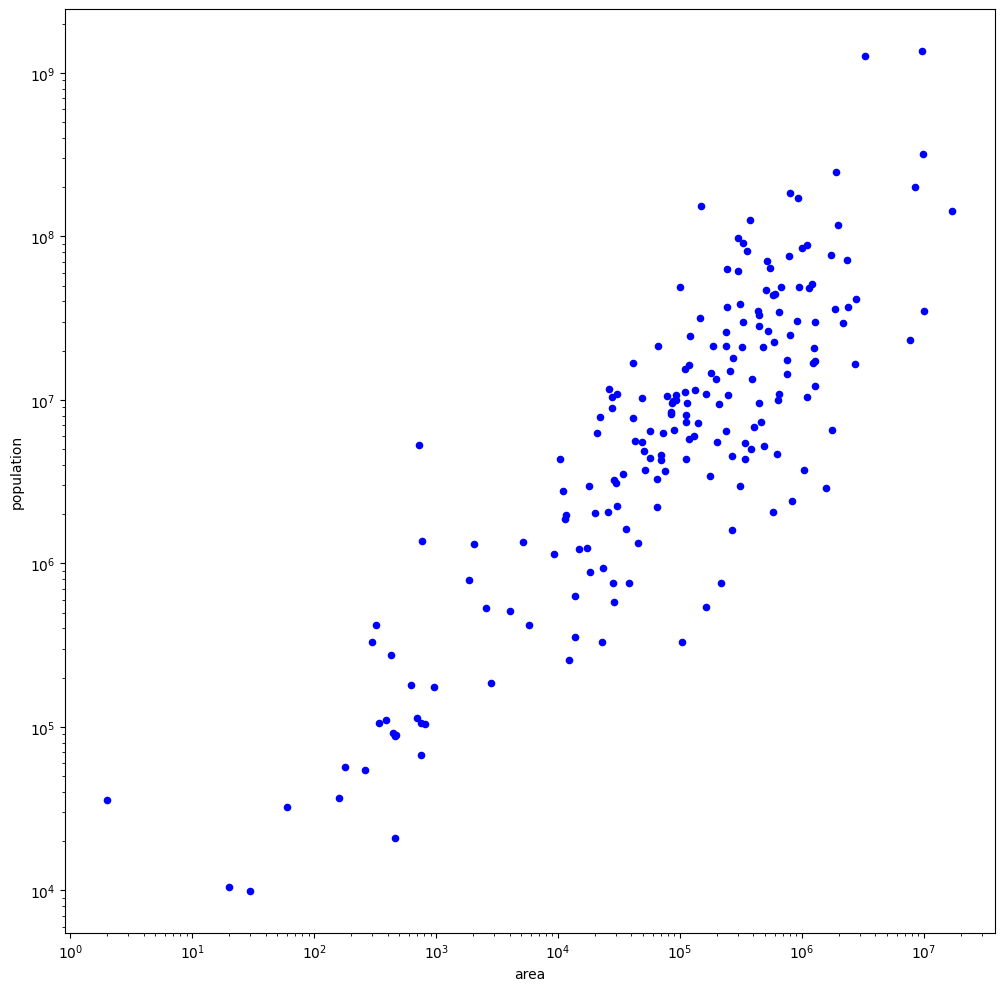

In [35]:
ax = countries.plot.scatter(
    x="area",
    y="population",
    color="blue",
    figsize=(12, 12),
    logx=True,
    logy=True,
);

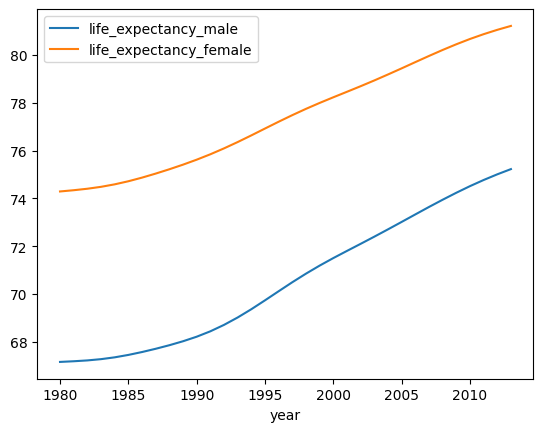

In [36]:
czech.plot(x="year", y=["life_expectancy_male", "life_expectancy_female"]);

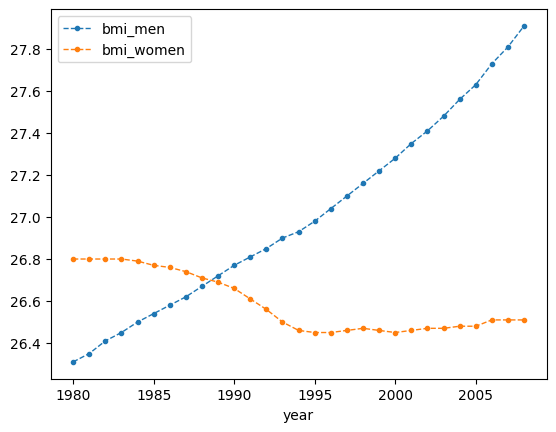

In [37]:
czech.plot.line(
    x="year",
    y=["bmi_men", "bmi_women"],
    lw=1,
    style="--",
    marker="o",       # Přidáme kulaté body pro hodnoty z tabulky
    markersize=3);

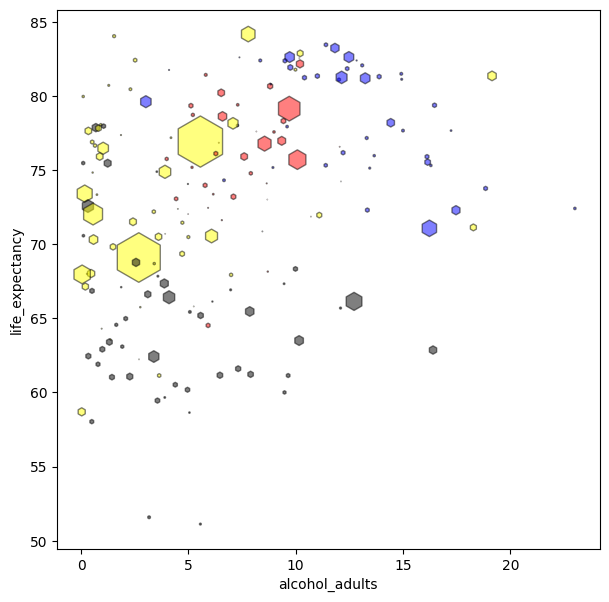

In [38]:
# čistej matpolib:
# https://matplotlib.org/3.1.1/gallery/index.html

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(
    countries["alcohol_adults"],
    countries["life_expectancy"],
    s=countries["population"] / 1e6,
    color=countries["world_4region"].map({"europe": "blue", "asia": "yellow", "africa": "black", "americas": "red"}),
    edgecolor="black",
    marker="h",
    alpha=0.5
);

# Popisky os musíme doplnit ručně
ax.set_xlabel("alcohol_adults")
ax.set_ylabel("life_expectancy");

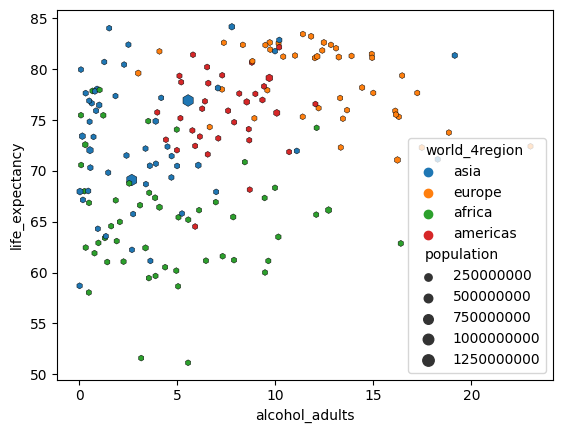

In [39]:
# seaborn:
# https://seaborn.pydata.org/examples/index.html

import seaborn as sns

sns.scatterplot(
    data=countries,          # Pracuje s DataFrame
    x="alcohol_adults",
    y="life_expectancy",     # Rozumí názvům sloupců :-)
    size="population",       # Velikost podle sloupce (nepříliš vhodná)
    hue="world_4region",     # Umí přiřadit barvičky podle nějaké kategorie
    edgecolor="black",       # Toto se předá matplotlibu (viz předchozí případ)
    marker="h"               # Toto se předá matplotlibu (viz předchozí případ)
);

In [40]:
# plotly:
# https://plot.ly/python/plotly-express/

import plotly.express as px

px.scatter(
    countries.reset_index(),    # Vrátíme si index zpátky do tabulky (jako "name")
    x="alcohol_adults",
    y="life_expectancy",
    size="population",
    color="world_4region",
    hover_name="name"           # Použije se při najetí myší jako titulek pomocného balonku
)

In [41]:
px.choropleth(
    countries.reset_index(),  
    locations="iso",
    color="life_expectancy",  
    hover_name="name"
)